In [57]:
import pandas as pd

df = pd.read_csv("aapl.csv",parse_dates=["Date"],index_col="Date",infer_datetime_format=True)
df.head(5)


C:\Users\thang\AppData\Local\Temp\ipykernel_7524\4171719590.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("aapl.csv",parse_dates=["Date"],index_col="Date",infer_datetime_format=True)
C:\Users\thang\AppData\Local\Temp\ipykernel_7524\4171719590.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("aapl.csv",parse_dates=["Date"],index_col="Date",infer_datetime_format=True)


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [58]:
df[(df['Date'] >='2017-07-01') & (df['Date'] <='2017-07-31')]

KeyError: 'Date'

In [ ]:
df

In [ ]:
df.Close.resample('ME').mean().plot()

In [ ]:


rng = pd.date_range(start='6/1/2017',end='6/30/2017',freq='B')
rng


In [ ]:
df_2 = pd.read_csv("aapl_no_dates.csv")

df_2.set_index(rng,inplace=True)

df_2

In [ ]:
df_2.asfreq(freq='D',method='PAD')

In [ ]:
rng = pd.date_range(start='6/1/2017',periods=100,freq='D')
rng

import numpy as np
values_se = pd.Series(np.random.randint(1,10,len(rng)),index=rng)


values_se

In [ ]:
y = pd.Period('2020')
y

In [ ]:
m = pd.Period('2020-01',freq='M')

m


In [ ]:
m.start_time

m.end_time

In [ ]:
h = pd.Period('2020-01-20 23:00:00',freq='h')
h


In [ ]:
h+1

In [ ]:
q = pd.Period('2017Q1',freq='Q-FEB')
q.start_time


In [ ]:
q.end_time

In [ ]:
idx = pd.period_range('2017-01',periods=10,freq='Q-JAN')
idx

In [ ]:
s = pd.Series(np.random.randint(0,10,len(idx)),index=idx)
s

In [ ]:
w = pd.read_csv('wmt.csv')
w

In [ ]:
w.set_index(['Line Item'],inplace=True)


In [ ]:
w=w.T

In [ ]:
w

In [ ]:
w.index = pd.PeriodIndex(w.index , freq='Q-JAN')

In [ ]:
w['end time'] = w.index.map(lambda x : x.end_time)
w

In [ ]:
msft_df = pd.read_csv('msft.csv',header=1,parse_dates=True,index_col='Date Time')

msft_df


In [ ]:
msft_df = msft_df.tz_localize(tz='US/Eastern')
msft_df.index

In [ ]:
msft_df.tz_convert(tz='Europe/Berlin')
msft_df

In [ ]:
rng = pd.date_range(start='2/2/2018',periods=10,freq='h',tz='Asia/Calcutta')
rng

In [81]:
import numpy as np

s = pd.Series(np.random.randint(1,len(rng)),index=rng)

s = s.tz_convert(tz='US/Eastern')
s

2018-02-01 13:30:00-05:00    8
2018-02-01 14:30:00-05:00    8
2018-02-01 15:30:00-05:00    8
2018-02-01 16:30:00-05:00    8
2018-02-01 17:30:00-05:00    8
2018-02-01 18:30:00-05:00    8
2018-02-01 19:30:00-05:00    8
2018-02-01 20:30:00-05:00    8
2018-02-01 21:30:00-05:00    8
2018-02-01 22:30:00-05:00    8
Freq: h, dtype: int64

In [93]:
fb=pd.read_csv('fb.csv',parse_dates=True,index_col='Date')
fb


C:\Users\thang\AppData\Local\Temp\ipykernel_7524\1184580312.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fb=pd.read_csv('fb.csv',parse_dates=True,index_col='Date')


,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


<Axes: xlabel='Date'>

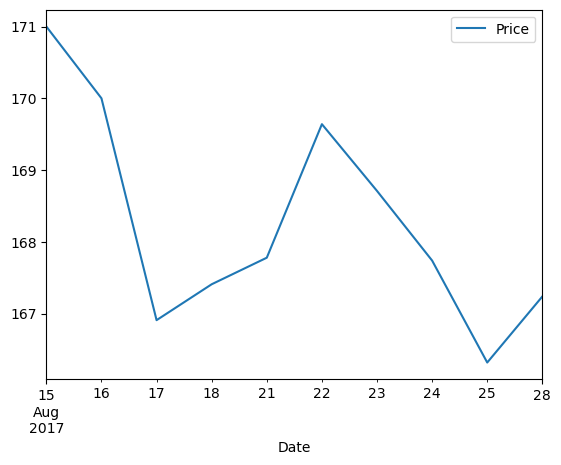

In [95]:
fb.plot()

<Axes: xlabel='Date'>

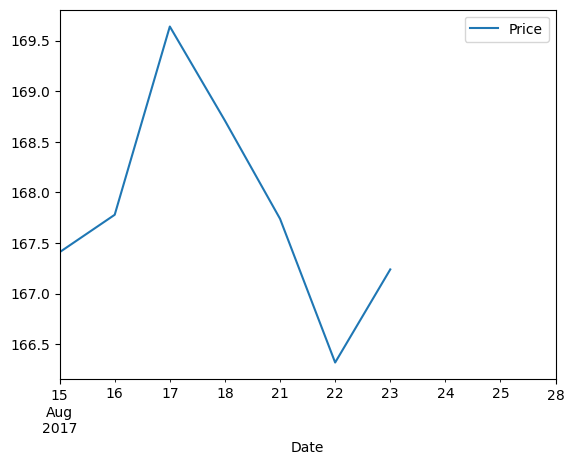

In [105]:
tp = fb.shift(-3)

tp.plot()

In [110]:

fb['Previous Day'] = fb.shift(1)

In [120]:
fb['Change'] = fb['Previous Day'] - fb['Price']

fb

,Price,Previous Day,Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,1.00
2017-08-17,166.91,170.00,3.09
2017-08-18,167.41,166.91,-0.50
2017-08-21,167.78,167.41,-0.37
2017-08-22,169.64,167.78,-1.86
2017-08-23,168.71,169.64,0.93
2017-08-24,167.74,168.71,0.97
2017-08-25,166.32,167.74,1.42


In [122]:
fb['5 day perc change'] = (fb['Price'] - fb['Price'].shift(5))* 100 /fb['Price'].shift(5)
fb


,Price,Previous Day,Change,5 day perc change
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,1.00,NaN
2017-08-17,166.91,170.00,3.09,NaN
2017-08-18,167.41,166.91,-0.50,NaN
2017-08-21,167.78,167.41,-0.37,NaN
2017-08-22,169.64,167.78,-1.86,-0.795322
2017-08-23,168.71,169.64,0.93,-0.758824
2017-08-24,167.74,168.71,0.97,0.497274
2017-08-25,166.32,167.74,1.42,-0.651096


In [124]:
fb.index = pd.date_range('2017-08-15',periods=10,freq='B')

fb

,Price,Previous Day,Change,5 day perc change
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,1.00,NaN
2017-08-17,166.91,170.00,3.09,NaN
2017-08-18,167.41,166.91,-0.50,NaN
2017-08-21,167.78,167.41,-0.37,NaN
2017-08-22,169.64,167.78,-1.86,-0.795322
2017-08-23,168.71,169.64,0.93,-0.758824
2017-08-24,167.74,168.71,0.97,0.497274
2017-08-25,166.32,167.74,1.42,-0.651096
2017-08-28,167.24,166.32,-0.92,-0.321850
